Describing the Bank.csv Dataset: 

               age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.00000

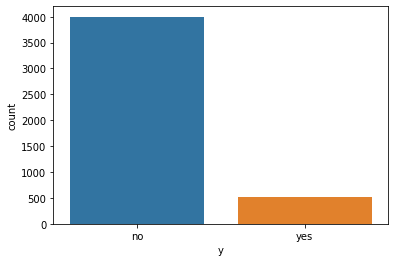

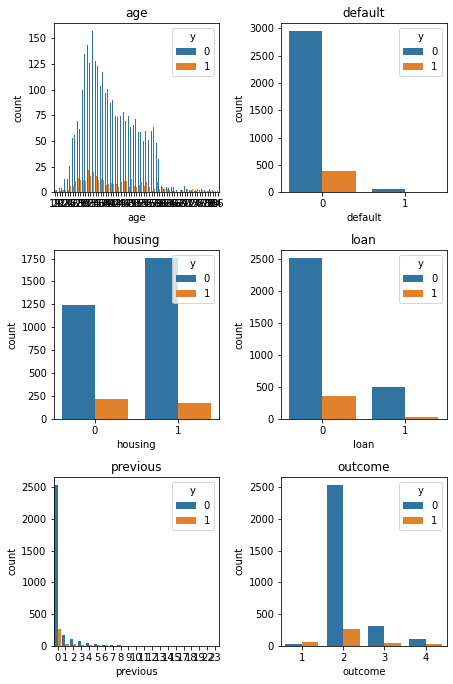

In [1]:
import pandas as pd
import numpy as np
import sys, time, os
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as mpl

#%%
os.chdir("C:/Users/Tanmaiy/Documents/IBM/bank")

# import dataset------------ step 2
df = pd.read_csv("bank.csv")   # we will create 2 files train and test

#%% some statistics
print("Describing the Bank.csv Dataset: \n")
print(df.describe())
print("---------------------------------------------------------------------------")
df['y'].value_counts()
sns.countplot(df['y'])
#%%
#%% set 3.5 ----------------> split data into train and test
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.25,random_state = 10)

#%% Set 4 -----------------> cleaning dataset
age_mean = train["age"].mean()

def fill_age(frame):
    frame["age"].fillna(age_mean, inplace = True, axis = 0)
    return frame

def fill_output(frame):
    frame["outcome"].fillna("unknown", inplace = True, axis = 0)
    return frame

def fill_loan(frame):
    frame["loan"].fillna("no", inplace = True, axis = 0)
    return frame

def fill_housing(frame):
    frame["housing"].fillna("no", inplace = True, axis = 0)
    return frame

def waste_var(frame):
    frame.drop(['job','marital','education','contact','campaign'], axis = 1, inplace = True)
    
    return frame

def clear_strings(frame):
    frame["outcome"]=frame["outcome"].map({"success":1,"unknown":2,"failure":3,"other":4})
    frame["y"] =frame["y"].map({"yes":1, "no":0})
    frame['loan']=frame['loan'].map({'yes':1,'no':0})
    frame['housing']=frame['housing'].map({'yes':1,'no':0})
    frame['default']=frame['default'].map({'yes':1,'no':0})
    frame['month']=frame['month'].map({'jan':0,'feb':1,'mar':2,'apr':3,'may':4,'jun':5,'jul':6,'aug':7,'sep':8,'oct':9,'nov':10,'dec':11})
    return frame

def master_function(frame):
    frame = fill_age(frame)
    frame = fill_output(frame)
    frame = fill_loan(frame)
    frame = fill_housing(frame)
    frame = clear_strings(frame)
    frame = waste_var(frame)
    return frame

train = master_function(train)
test = master_function(test)

#%% #visuvalising test and train data
cols=['age','default','housing','loan','previous','outcome']
n_rows=3
n_cols=2
fig,axs=mpl.subplots(n_rows,n_cols,figsize=(n_cols*3.2,n_rows*3.2))

for r in range(0,n_rows):
    for c in range(0,n_cols):
        i=r*n_cols+c
        ax=axs[r][c]
        sns.countplot(train[cols[i]],hue=train['y'],ax=ax)
        ax.set_title(cols[i])
        ax.legend(title="y",loc="upper right")
mpl.tight_layout()

# %% seprate the target variable and independent variables

def x_and_y(frame):
    inden = frame.drop(["y"], axis = 1)
    target = frame["y"]
    return inden, target

x_train, y_train = x_and_y(train)
x_test, y_test  = x_and_y(test)
#%%
sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)
# %%
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

# %%
model_prediction = model.predict(x_test)
# %%
cm=confusion_matrix(y_test,model.predict(x_test))

#Extract TrueNegative,TruePsitive,FalseNegative,FalsePositive
TN,FP,FN,TP=confusion_matrix(y_test,model.predict(x_test)).ravel()
test_score=((TP+TN)/(TP+TN+FP+FN))*100
print("---------------------------------------------------------------------------")
print(" \nMatrix for TN,FP,FN,TP \n")
print(cm)
print('\n Logistic Regeression Testing Accuracy="{}%"'.format(test_score))
print()
print("---------------------------------------------------------------------------")
#%%
#value=[[61,0,6610,0,0,24,1,481,-1,0,2]]
value=[[44,0,1844,0,0,13,6,1018,-1,0,2]]
survival = sc.transform(value)

#%%
#using Logistic Regeression to predict
pred = model.predict(survival)
print("The output for the data '{}' is :\n".format(value))
#%%
if pred==0:
    print("\n No \n")
else:
    print("\n Yes \n")

# %%
